In [ ]:
pip install anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 4.7 MB/s eta 0:00:00


In [ ]:
pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.2 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=4f8caa49c87e9dc2fd0f8e024e869606d5cabcb8611b3264451d007fc375d284
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
import scanpy as sc

#cargar archivo
def cargar_datos(ruta_archivo):
  adata = sc.read_h5ad(ruta_archivo)
  return adata

  ruta_archivo = '/content/drive/MyDrive/CodigosAnalisisAlgoritmos/p8dataset.h5ad'
  adata = cargar_datos(ruta_archivo)
  print(adata)

In [ ]:
tissue_groups = adata.obs['tissue'].unique()
print(tissue_groups)

['myelencephalon', 'pons', 'hippocampal formation', 'cerebral nuclei', 'thalamic complex', 'midbrain', 'hypothalamus', 'spinal cord', 'cerebral cortex', 'cerebellum']
Categories (10, object): ['cerebral cortex', 'pons', 'midbrain', 'hypothalamus', ...,
                          'hippocampal formation', 'myelencephalon', 'thalamic complex', 'cerebral nuclei']


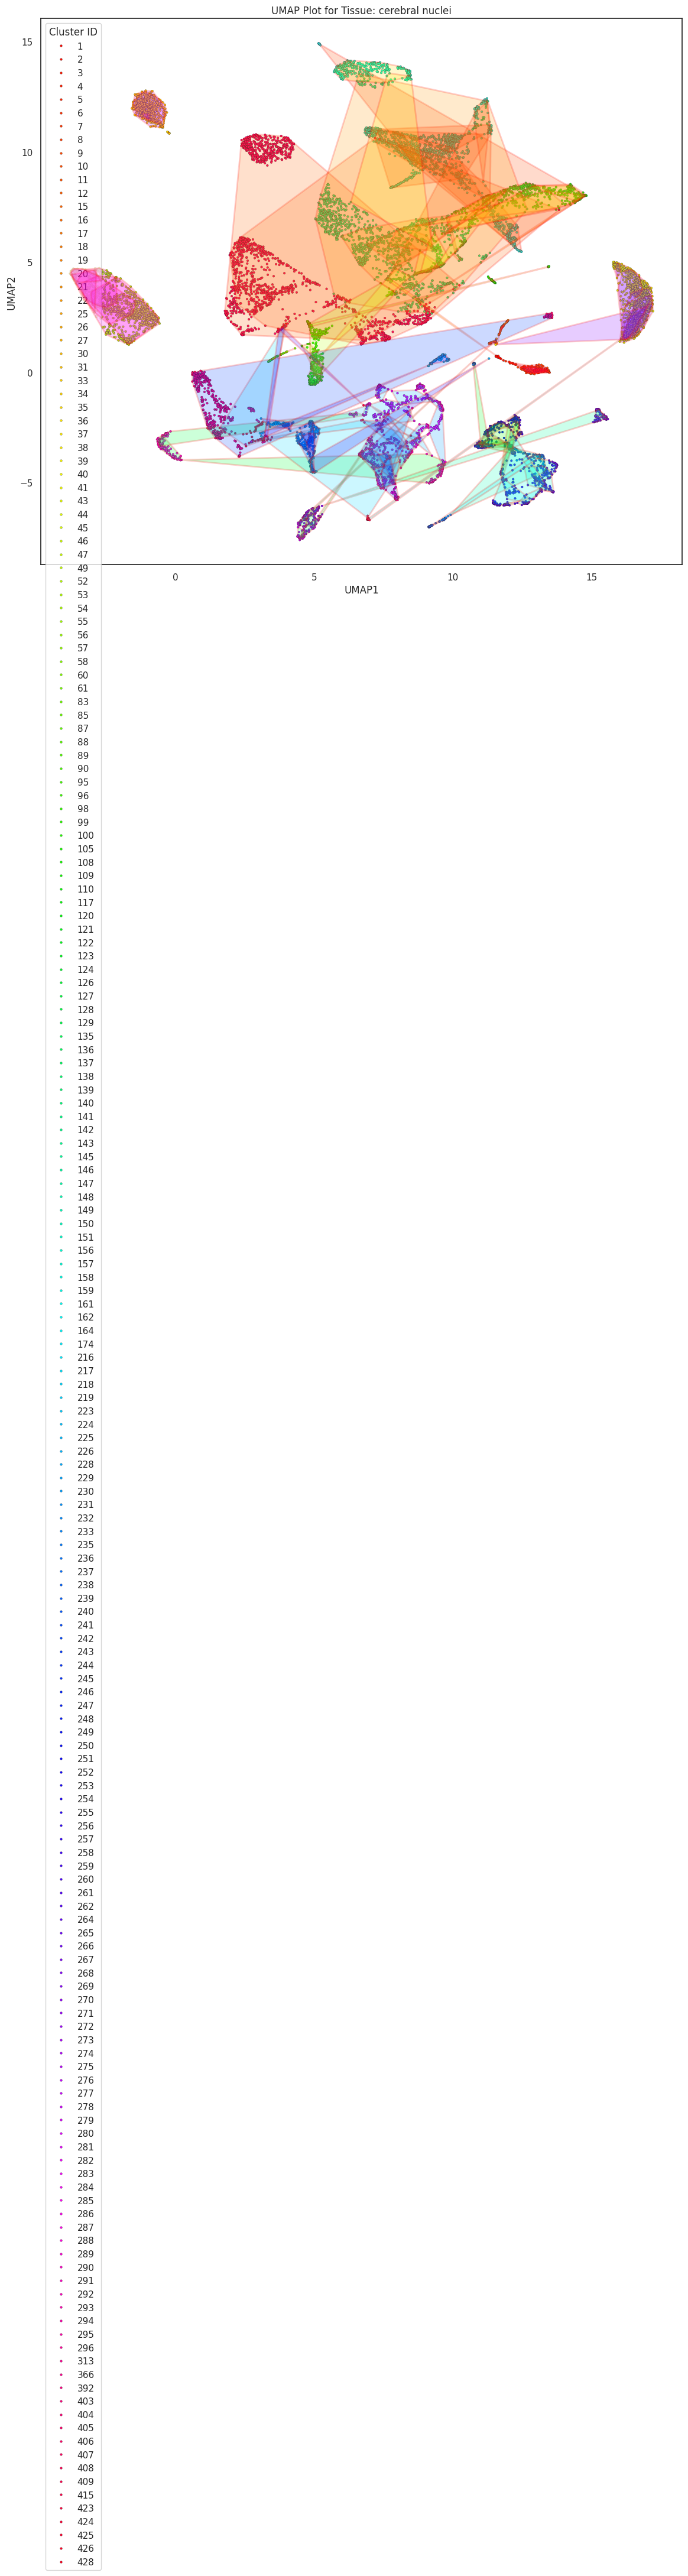

In [ ]:
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial import ConvexHull
import numpy as np
import scanpy as sc
import time
from matplotlib.patches import Polygon

file_path	= '/content/drive/MyDrive/CodigosAnalisisAlgoritmos/p8dataset.h5ad'
adata = ad.read_h5ad(file_path)

tissue_groups = adata.obs['tissue'].unique()

#for para dividir
for tissue in tissue_groups:
    adata_subset = adata[adata.obs['tissue'] == tissue, :]

    umap_cor = adata_subset.obsm['X_UMAP']
    cluster_id = adata_subset.obs['cluster_id']

    umap_df = pd.DataFrame(umap_cor, columns=['UMAP1', 'UMAP2'])
    umap_df['cluster_id'] = cluster_id.values

    plt.figure(figsize=(14,12))

    #Configuración de colores para los clusters
    sns.set(style="white")
    palette = sns.color_palette('hsv', len(cluster_id.unique()))

    sns.scatterplot(x='UMAP1', y='UMAP2', hue='cluster_id', data=umap_df, palette=palette, s=7, edgecolor='k')

    for i, cluster in enumerate(umap_df['cluster_id'].unique()):
        cluster_points = umap_df[umap_df['cluster_id'] == cluster][['UMAP1', 'UMAP2']].values
        if len(cluster_points) > 2:
          hull = ConvexHull(cluster_points)
          hull_vertices = np.append(hull.vertices, hull.vertices[0])
          polygon = Polygon(cluster_points[hull_vertices], closed=True,
                            edgecolor=palette[1], linewidth=2,
                            facecolor=palette[i], alpha = 0.2, zorder=10)
          plt.gca().add_patch(polygon)

    plt.title(f'UMAP Plot for Tissue: {tissue}')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(title='Cluster ID')
    plt.show()

AnnData object with n_obs × n_vars = 10778 × 59236
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_UMAP', 'X_tSNE'
CellID
10X191_8:GTGTCCTCATGACTGT       neuron


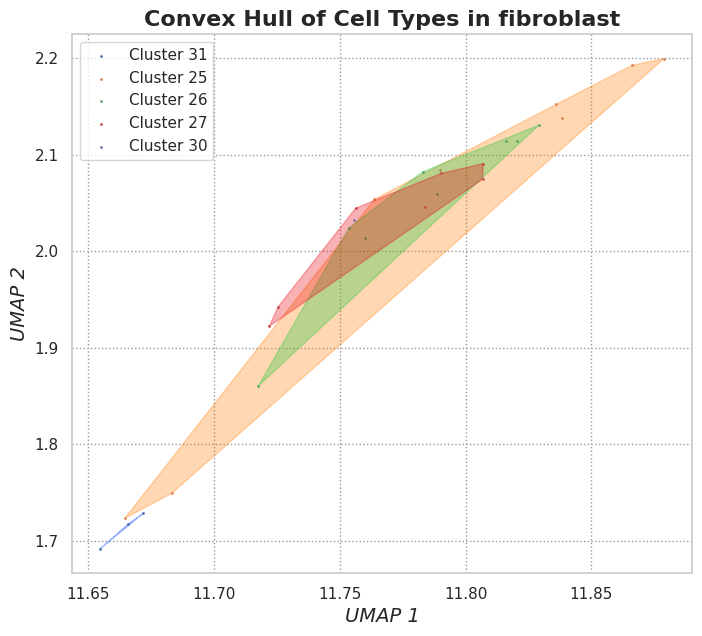

endothelial cell


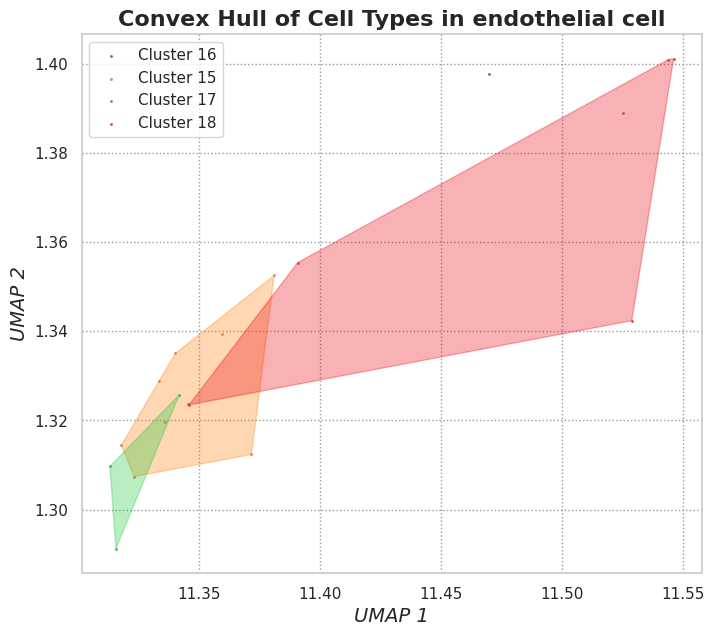

astrocyte


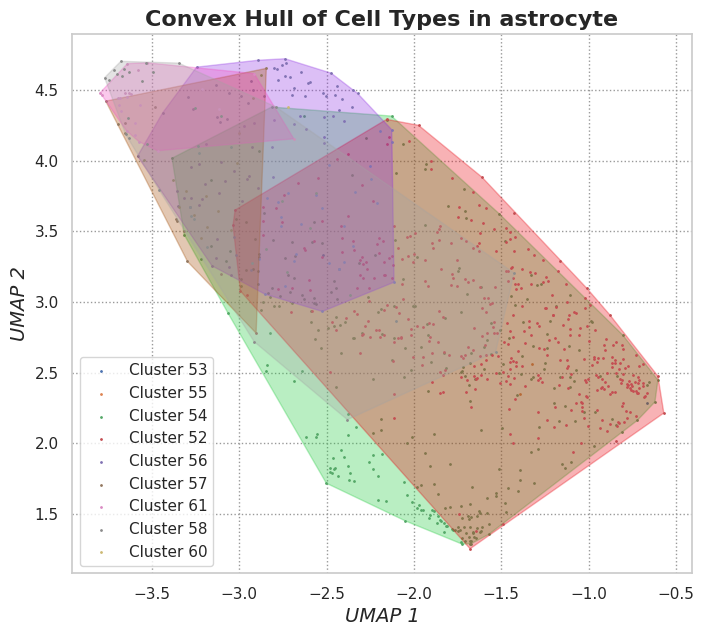

oligodendrocyte


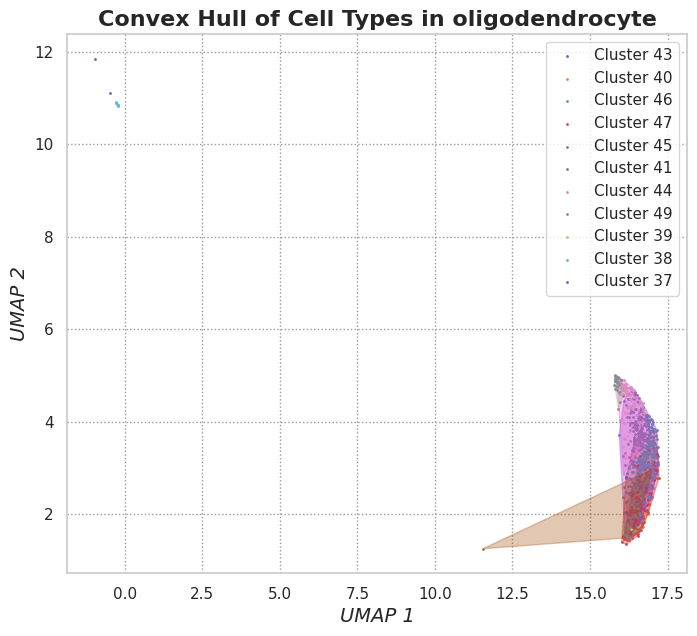

vascular associated smooth muscle cell


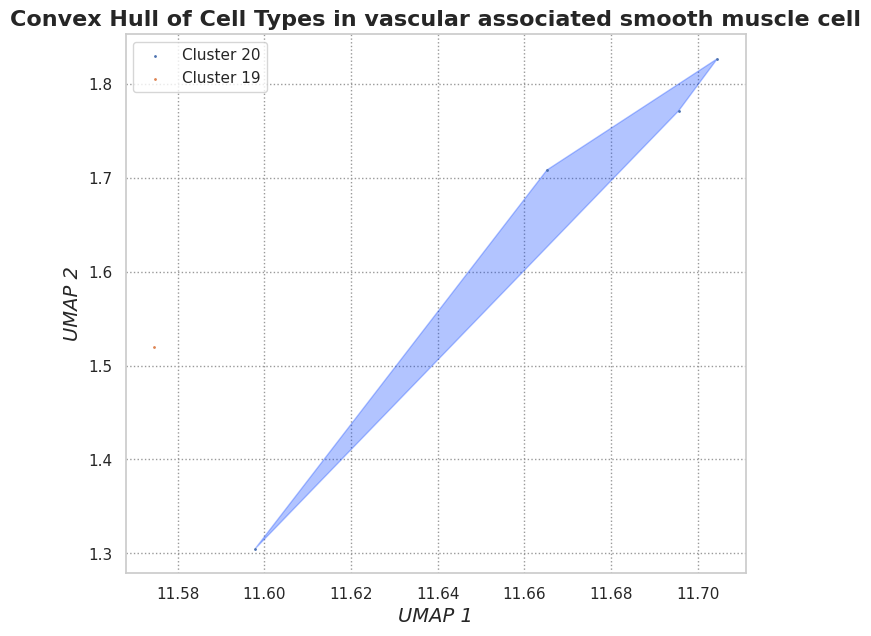

neuron


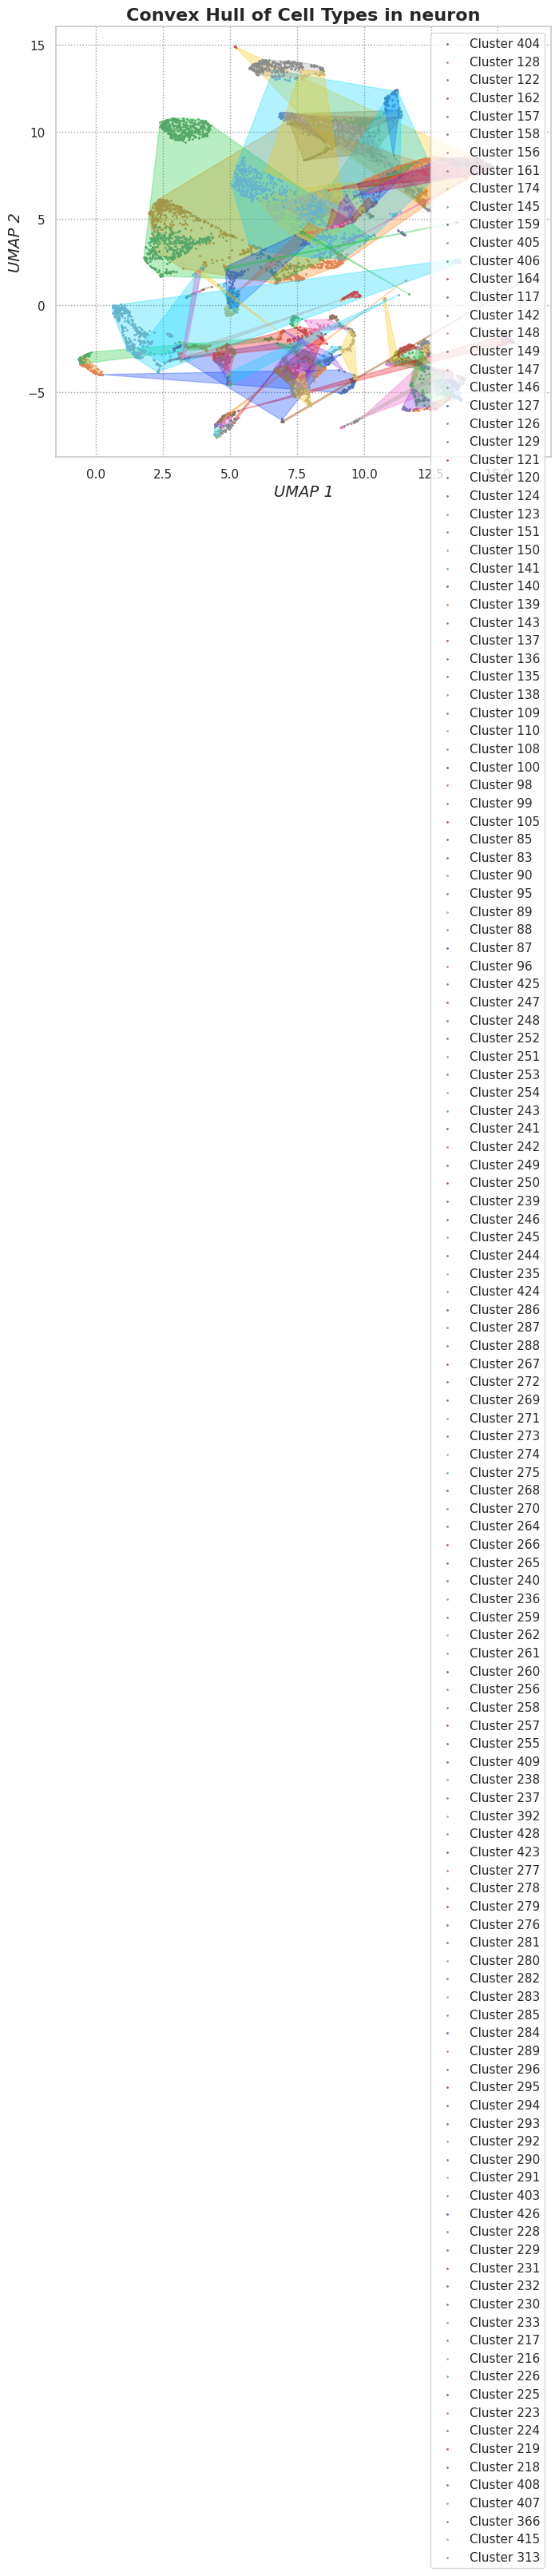

pericyte


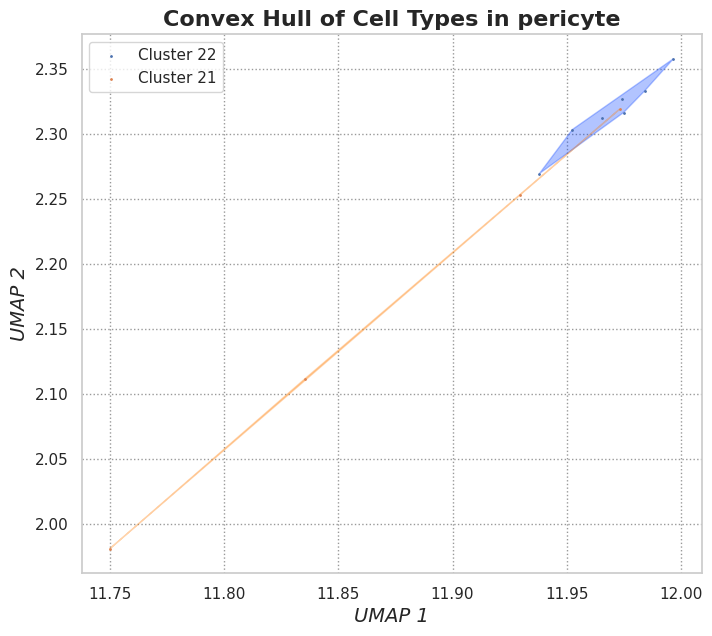

leukocyte


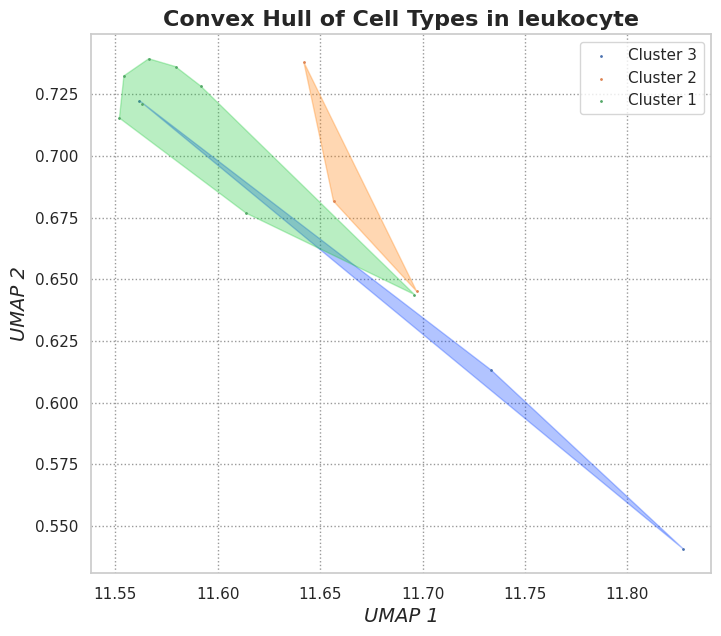

central nervous system macrophage


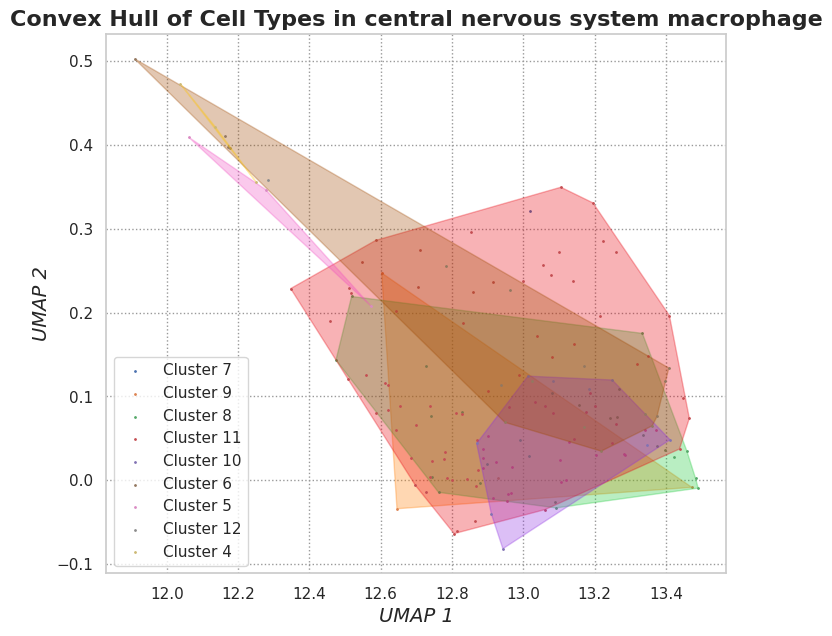

oligodendrocyte precursor cell


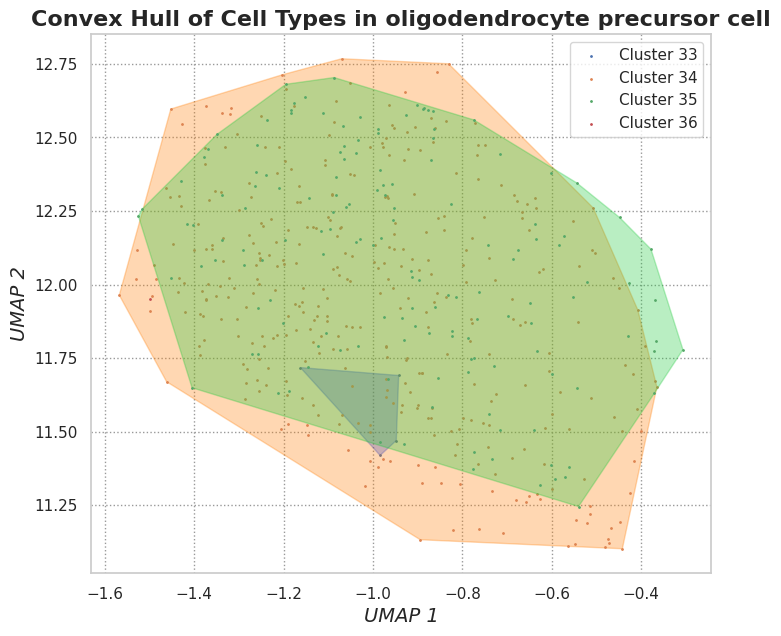

In [ ]:
import anndata as ad                      # Data Science
import matplotlib.pyplot as plt           # Graphing
import seaborn as sns                     # Statistics
import pandas as pd                       # Data Science
import numpy as np                        # Math functions
import scanpy as sc
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

# Load the .h5ad file
file_path = '/content/drive/MyDrive/CodigosAnalisisAlgoritmos/p8dataset.h5ad'
adata = ad.read_h5ad(file_path)
print(adata)

# Get cluster labels (UMAP and tSNE use the same)
tissue = adata.obs['cell_type']
print(tissue)

# Get categories array (different tissues names)
categories = tissue.cat.categories.tolist()
print(categories)

for tissue_type in categories:
    print(tissue_type)

    # Get subset in order to cathegorize per tissue type each graph
    adata_subset = adata[adata.obs['cell_type'] == tissue_type, :]

    # Get UMAP coordinates
    umap_cord = adata_subset.obsm['X_UMAP']

    # Graph size configuration
    plt.figure(figsize = (8, 7))

    # Matching colors for tissue types
    sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
    palette = sns.color_palette('bright', len(adata_subset.obs['cluster_id'].unique()))

    # Calculate and plot convex hull
    for i, cluster in enumerate(adata_subset.obs['cluster_id'].unique()):
        points = umap_cord[adata_subset.obs['cluster_id'] == cluster]

        if len(points) >= 3:
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]

            # Graph convex hull results
            plt.fill(hull_points[:, 0], hull_points[:, 1], alpha = 0.3, color=palette[i])

        # Graph UMAP coordinates
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster}', s = 1)

    # Graph configuration
    plt.title(f'Convex Hull of Cell Types in {tissue_type}', fontsize=16, fontweight='bold')
    plt.xlabel('UMAP 1', fontsize=14, fontstyle='italic')
    plt.ylabel('UMAP 2', fontsize=14, fontstyle='italic')
    plt.legend()
    plt.show()


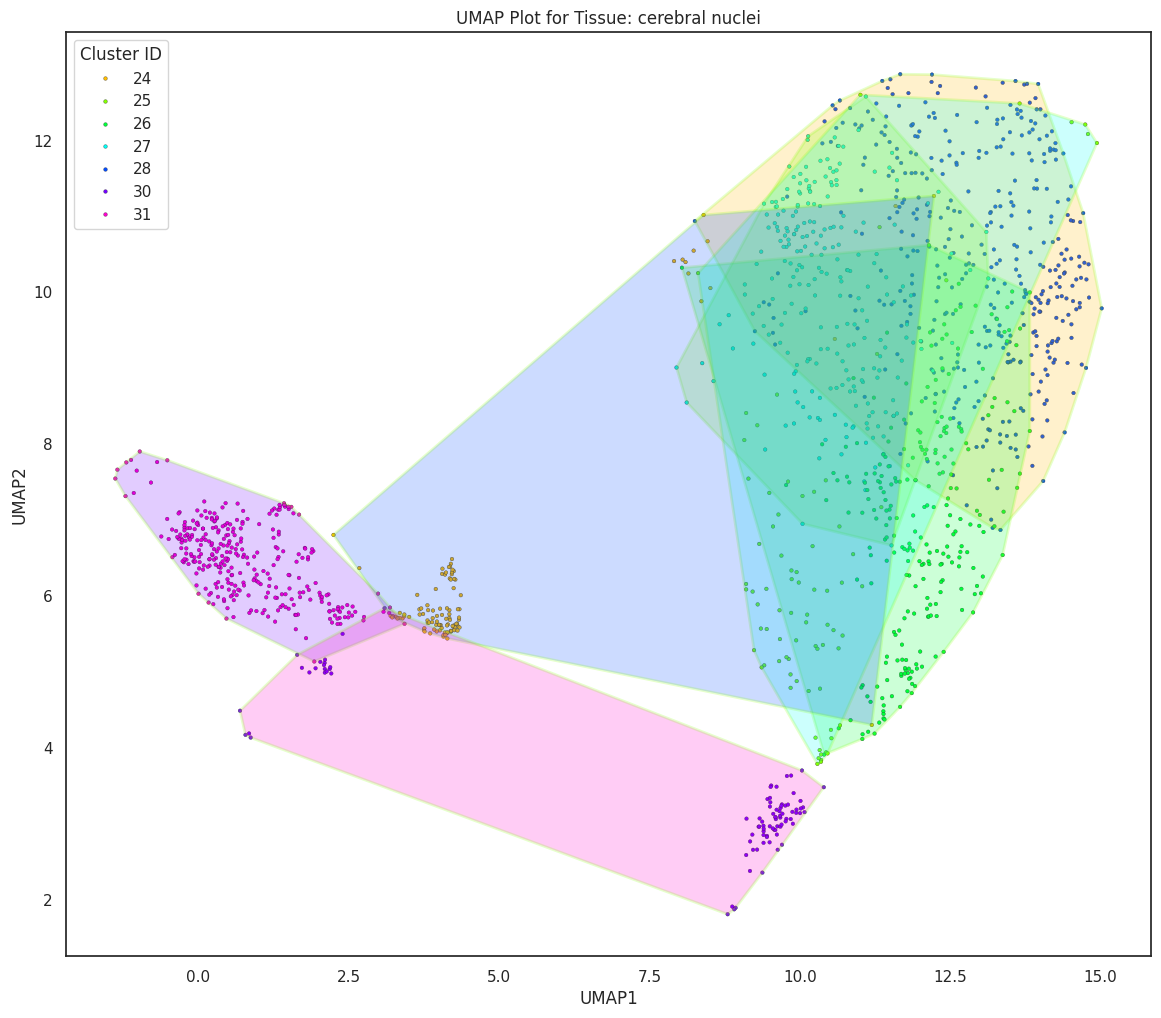

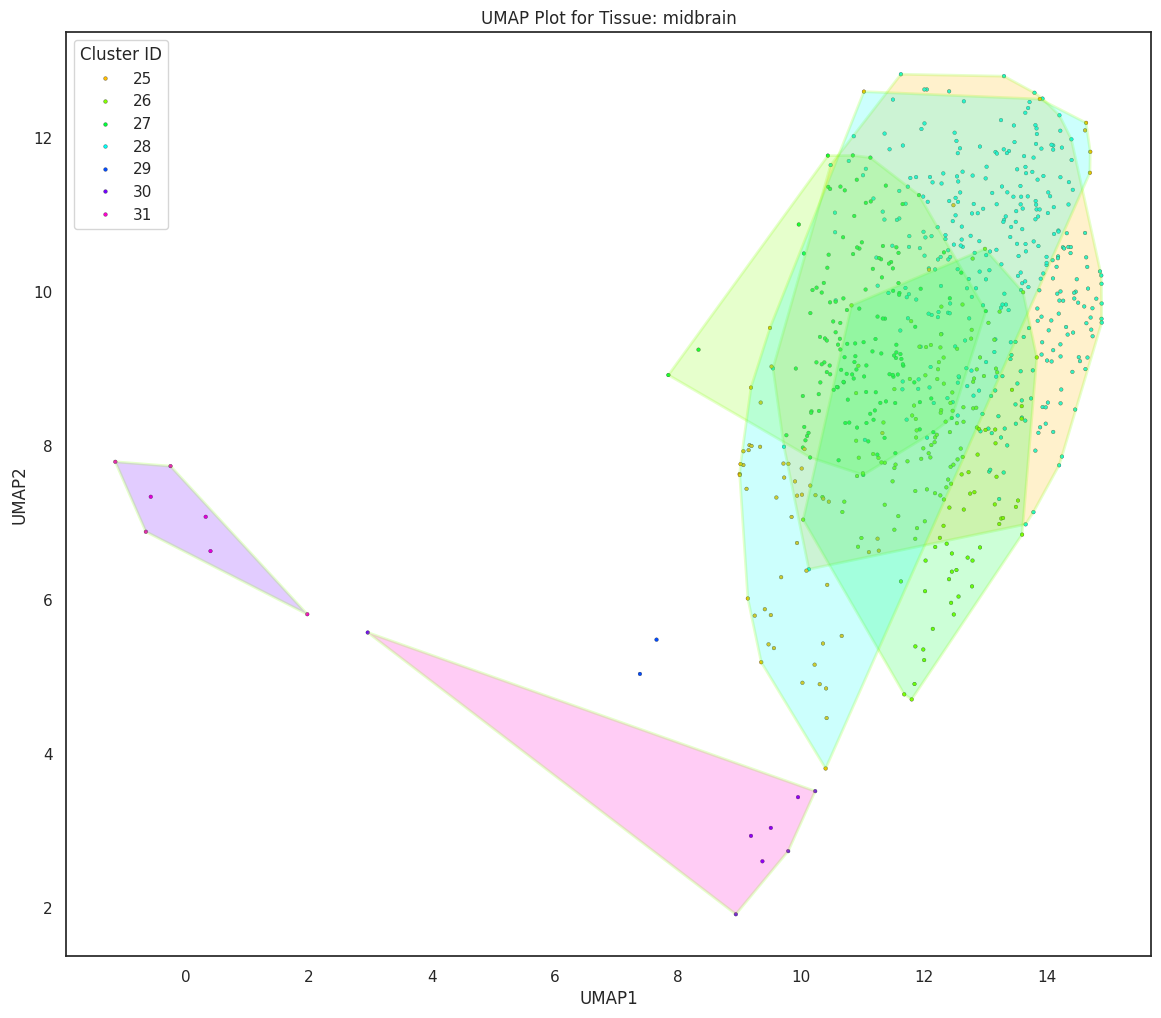

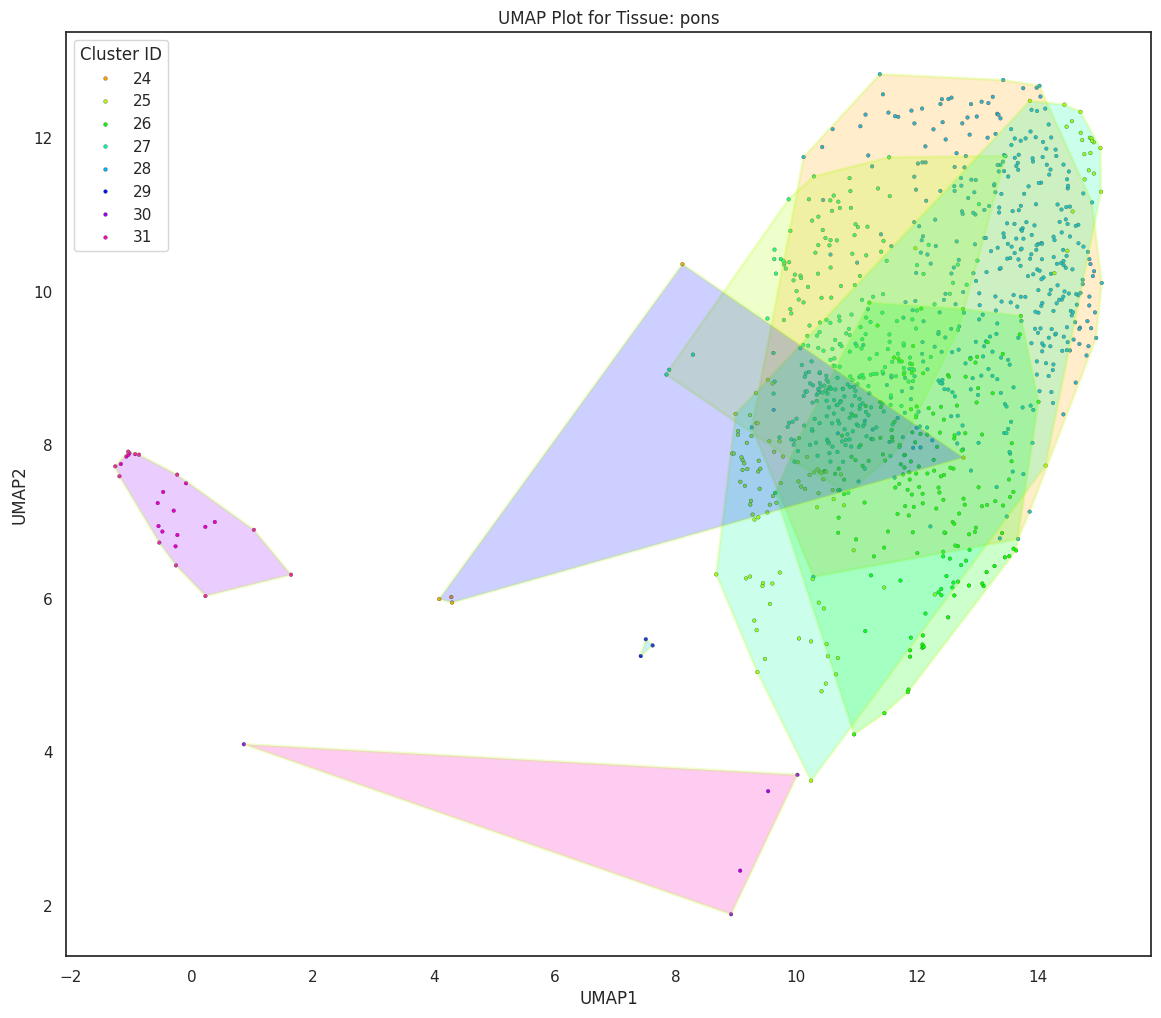

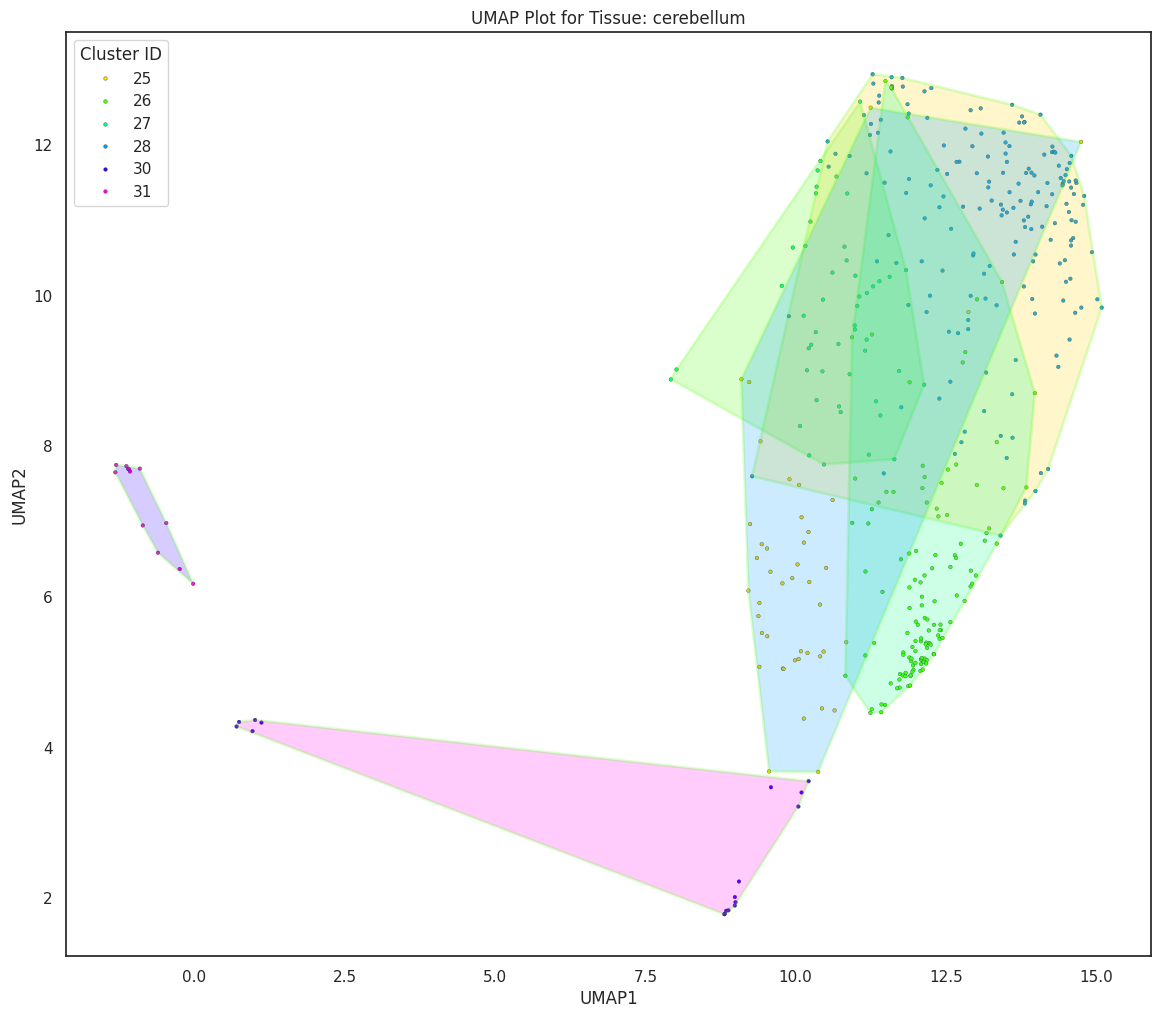

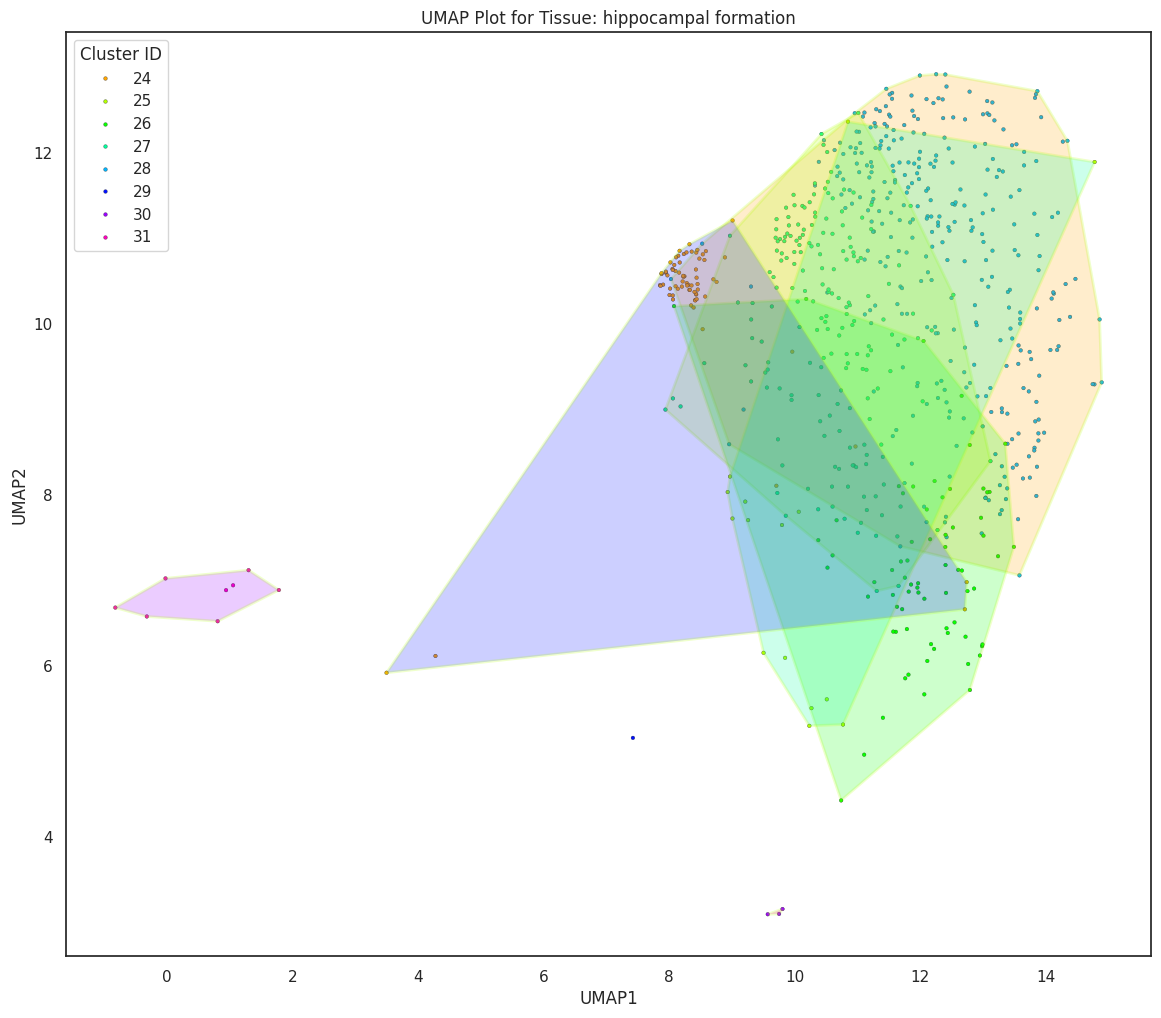

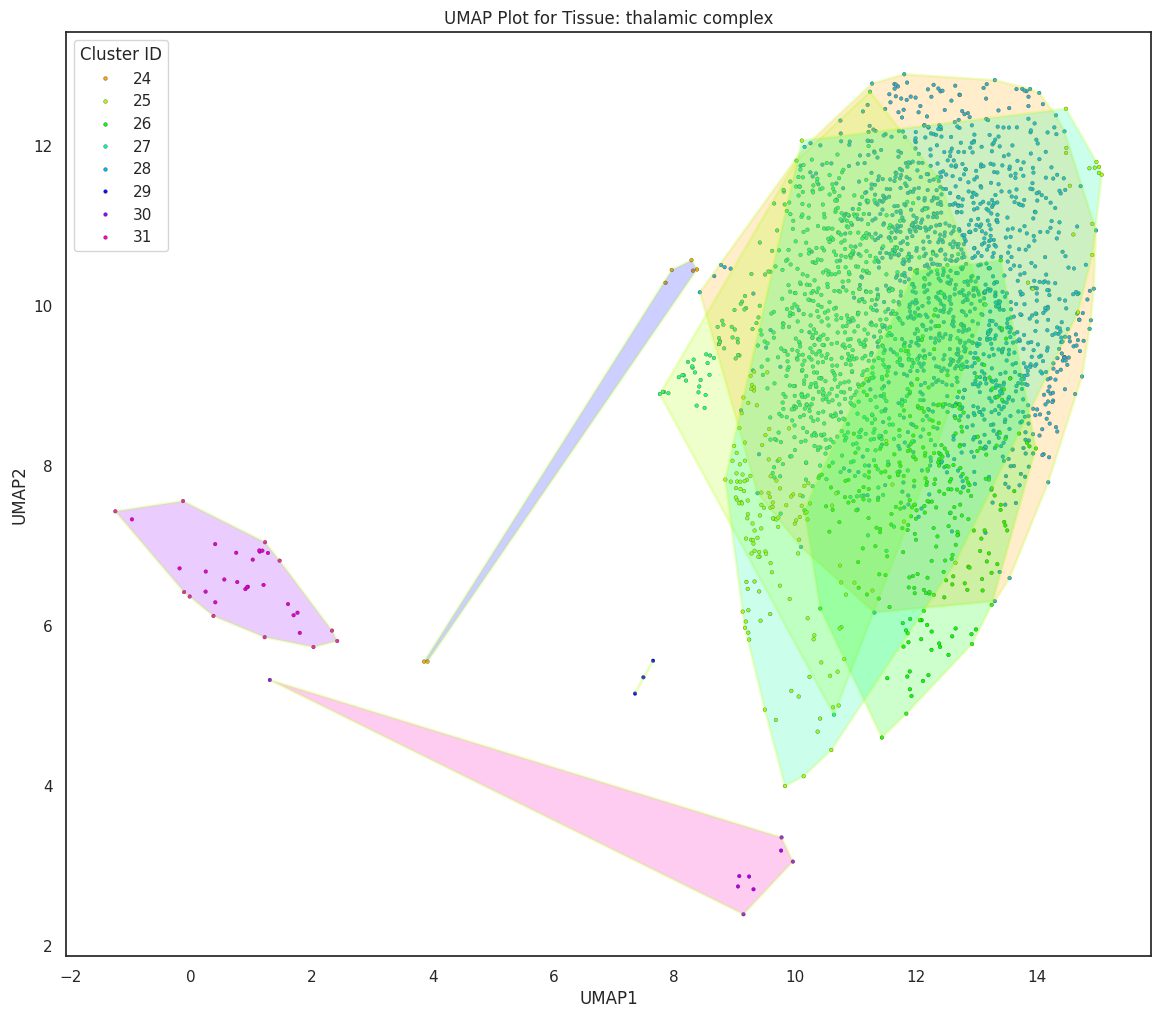

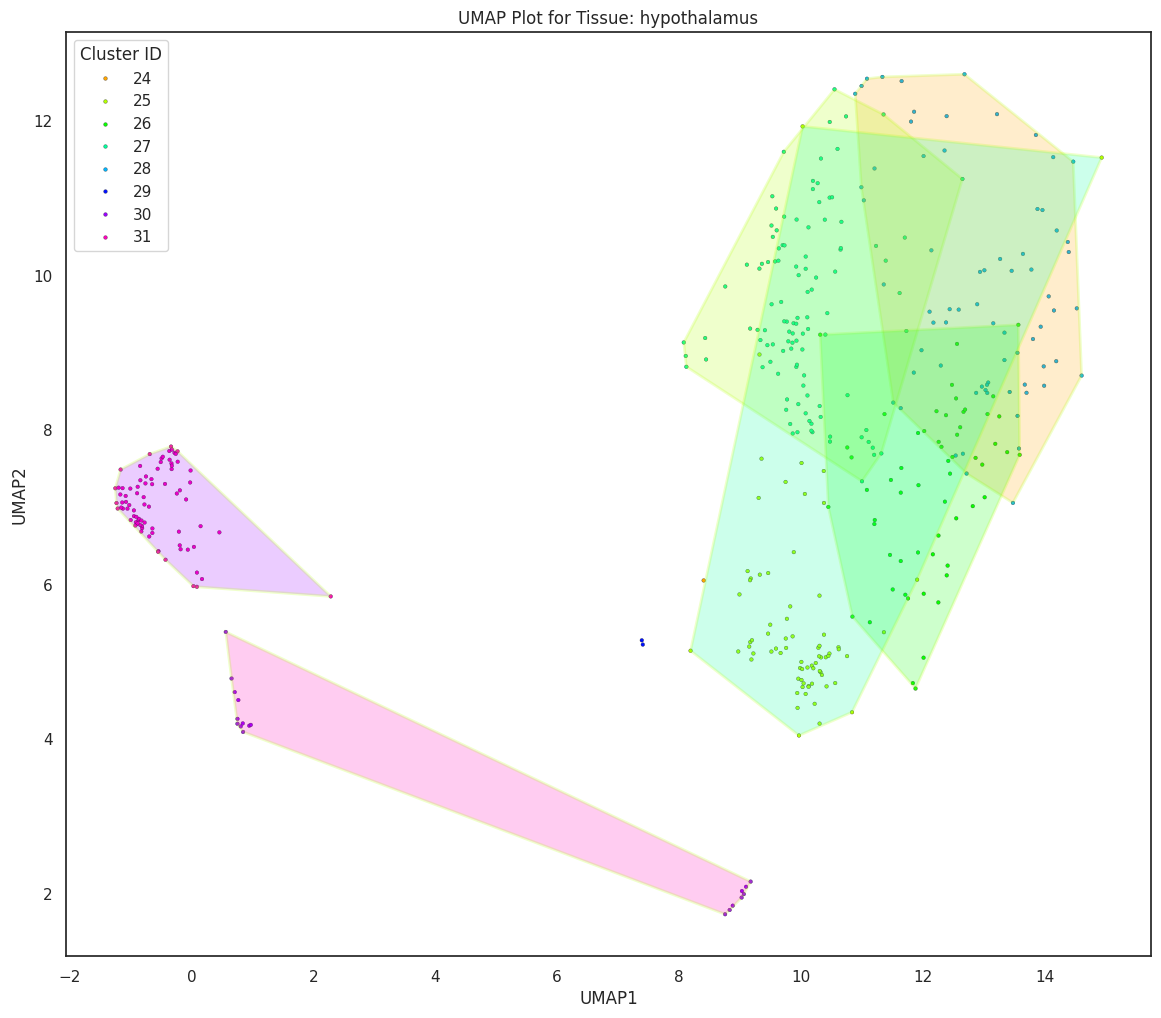

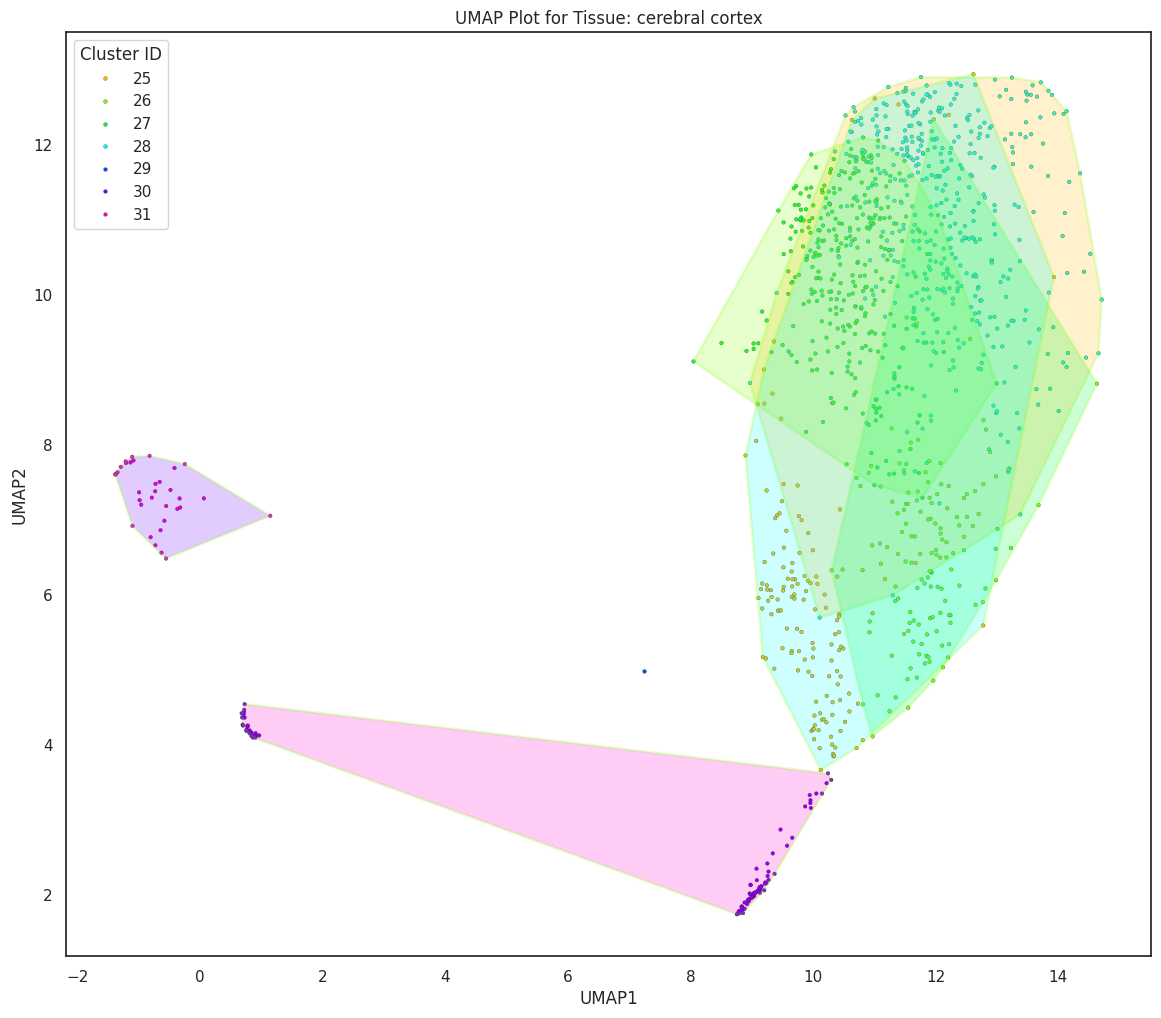

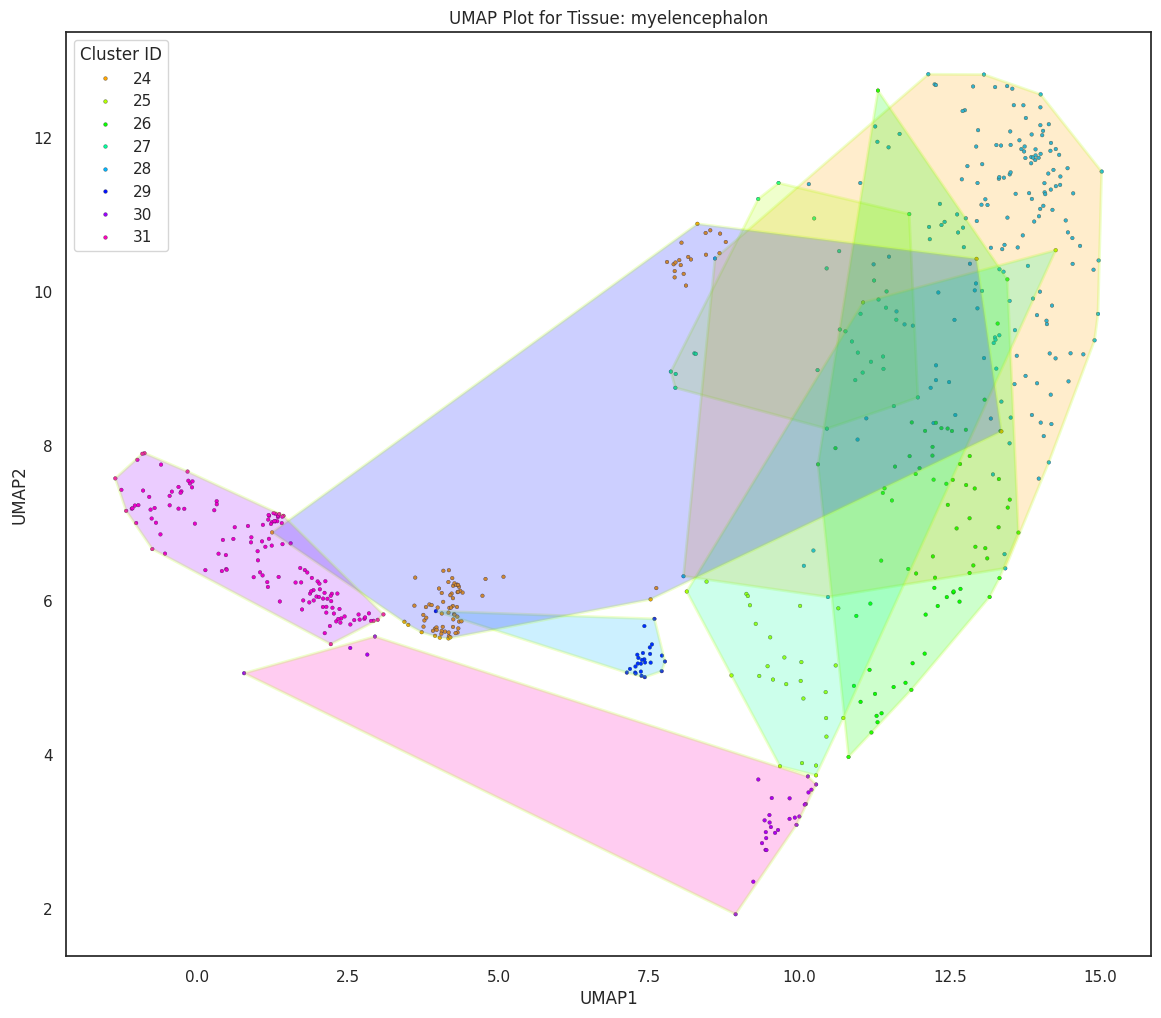

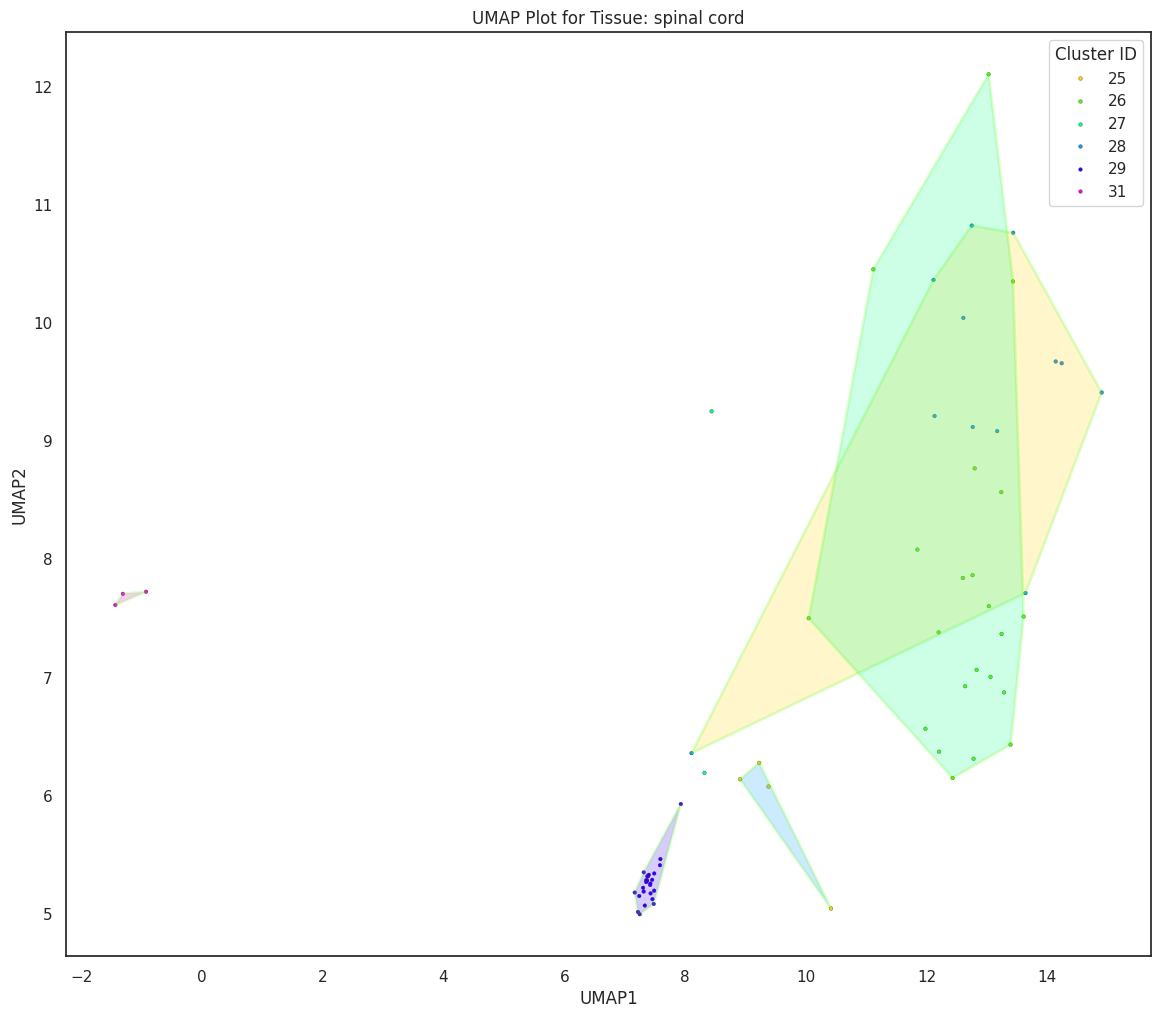

In [ ]:
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.spatial import ConvexHull
import numpy as np
import scanpy as sc
import time
from matplotlib.patches import Polygon

file_path	= '/content/drive/MyDrive/CodigosAnalisisAlgoritmos/prac8data.h5ad'
adata = ad.read_h5ad(file_path)

tissue_groups = adata.obs['tissue'].unique()

#for para dividir
for tissue in tissue_groups:
    adata_subset = adata[adata.obs['tissue'] == tissue, :]

    umap_cor = adata_subset.obsm['X_UMAP']
    cluster_id = adata_subset.obs['cluster_id']

    umap_df = pd.DataFrame(umap_cor, columns=['UMAP1', 'UMAP2'])
    umap_df['cluster_id'] = cluster_id.values

    plt.figure(figsize=(14,12))

    #Configuración de colores para los clusters
    sns.set(style="white")
    palette = sns.color_palette('hsv', len(cluster_id.unique()))

    sns.scatterplot(x='UMAP1', y='UMAP2', hue='cluster_id', data=umap_df, palette=palette, s=7, edgecolor='k')

    for i, cluster in enumerate(umap_df['cluster_id'].unique()):
        cluster_points = umap_df[umap_df['cluster_id'] == cluster][['UMAP1', 'UMAP2']].values
        if len(cluster_points) > 2:
          hull = ConvexHull(cluster_points)
          hull_vertices = np.append(hull.vertices, hull.vertices[0])
          polygon = Polygon(cluster_points[hull_vertices], closed=True,
                            edgecolor=palette[1], linewidth=2,
                            facecolor=palette[i], alpha = 0.2, zorder=10)
          plt.gca().add_patch(polygon)

    plt.title(f'UMAP Plot for Tissue: {tissue}')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(title='Cluster ID')
    plt.show()